## No markings

<class 'numpy.ndarray'>
(array(235.11475751), array(232.9574565))
0.00700000002961245
25.20000010660482


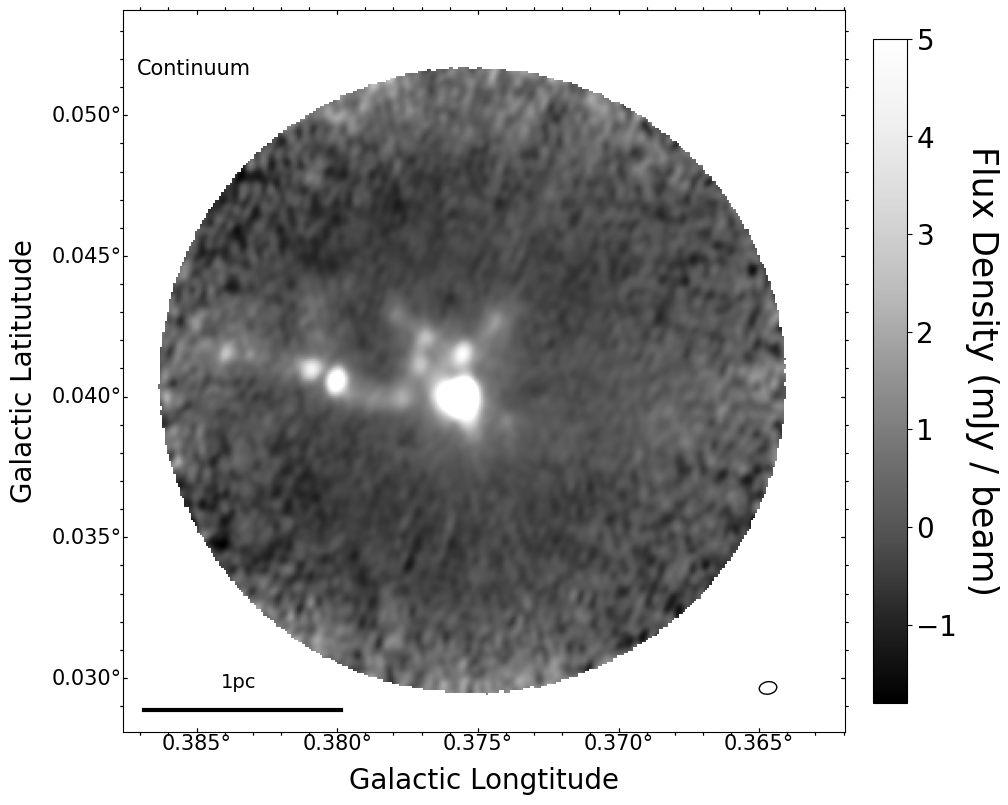

In [4]:
import math
import astropy.io.fits as fits
import matplotlib
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS    
from radio_beam import Beam
from astropy import units as u  
import pylab
import numpy as np
import reproject
from spectral_cube import SpectralCube   
from reproject.mosaicking import find_optimal_celestial_wcs 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
'''
path ="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image=fits.getdata(path)
mJy_image = image * 1000        # 1 Jy = 1000 mJy so we would multiply our image by 1000
header['BUNIT'] = 'mJy/beam '
print(header['BUNIT'])
fits.writeto('CloudC_mJy.fits',mJy_image,header,overwrite=True) 
'''

path ="CloudC_mJy.fits"
image=fits.getdata(path)

header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)
print(type(image))

image_2D = pylab.squeeze(image)

######
wcs_out,shape_out= find_optimal_celestial_wcs([(image_2D,w1)],frame='galactic')     # Use reproject functions
cont,c_footprint = reproject.reproject_interp((image_2D,w1),wcs_out,shape_out=shape_out)      # Rotate image
 
#init plot and axes
fig1 = plt.figure(1,figsize=(10,10),constrained_layout=True)       
ax1 = plt.subplot(projection=wcs_out)            
lon = ax1.coords[0]
lon.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)
lat = ax1.coords[1]
lat.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)
lon.display_minor_ticks(True)
lat.display_minor_ticks(True)
plt.xlim(80,410)
plt.ylim(80,410)
my_beam = Beam.from_fits_header(header)  
ycen_pix, xcen_pix = 100, 375
pixscale = 0.28 * u.arcsec
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
im1 = plt.imshow(cont,cmap='Greys_r',vmax=5)
plt.gca().add_patch(ellipse_artist)
ellipse_artist.set_facecolor("white")
ellipse_artist.set_edgecolor("black")

#plots the subcube patch
core_coords=w1.pixel_to_world(166,175)
image_coords=core_coords.to_pixel(wcs_out,0,mode="wcs")
print(image_coords)
x=[90,180]
y=[90,90]
plt.plot(np.array([x[0],x[1]]),np.array([y[0],y[1]]),color="black",linewidth=3)
scalebarBegin=w1.pixel_to_world(x[0],y[0])
scalebarEnd=w1.pixel_to_world(x[1],y[1])
sep=scalebarBegin.separation(scalebarEnd)
print(sep.degree)
print(sep.degree*3600)
pylab.text(125,100,'1pc',fontsize=14,color='black')

#formats plot
lon.set_ticks(size=-3)                                                                                     
lat.set_ticks(size=-3)                                                                                   
pylab.xlabel('Galactic Longtitude',fontsize=20,labelpad=1)                              
pylab.ylabel('Galactic Latitutude',fontsize=20,labelpad=1)                                  
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)                      
plt.annotate('Continuum',fontsize=15,xy=(0.02,0.91),xycoords="axes fraction")
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (mJy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20) 

#saves fig
pylab.savefig("continuum.pdf",dpi=250,pad_inches=1)
pylab.savefig("continuum.png",dpi=250,pad_inches=1)


## Brightest Source by eye 

<class 'numpy.ndarray'>
(array(235.11475751), array(232.9574565))
0.00700000002961245
25.20000010660482


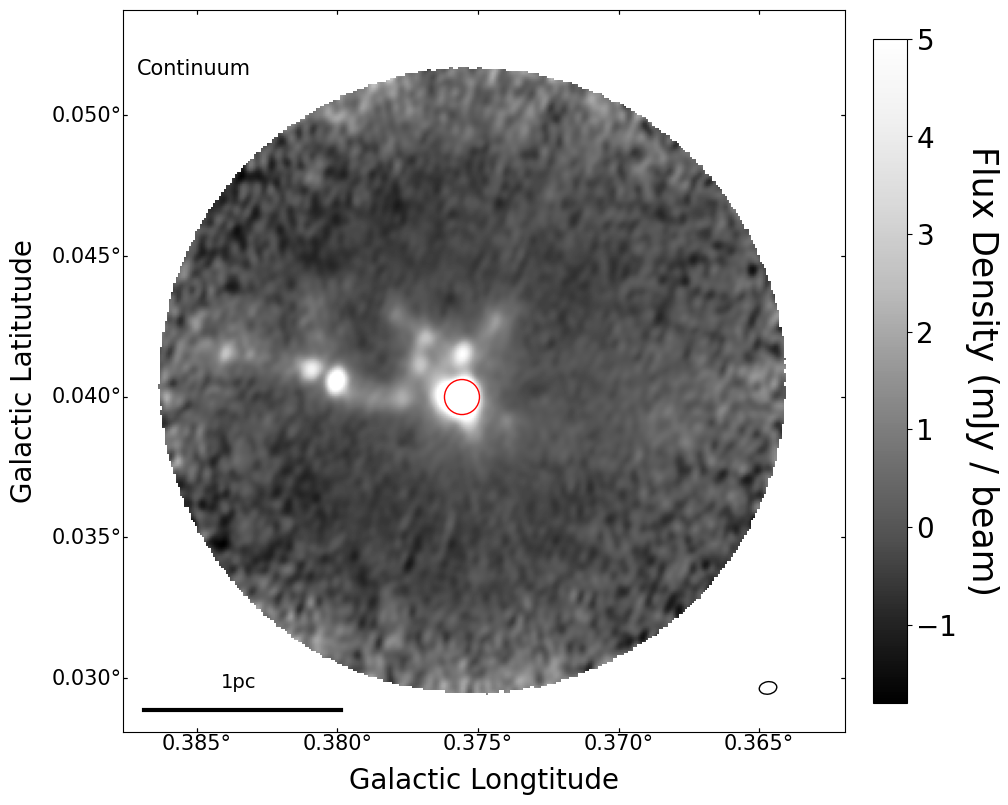

In [1]:
import math
import astropy.io.fits as fits
import matplotlib
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS    
from radio_beam import Beam
from astropy import units as u  
import pylab
import numpy as np
import reproject
from spectral_cube import SpectralCube   
from reproject.mosaicking import find_optimal_celestial_wcs 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
'''
path ="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image=fits.getdata(path)
mJy_image = image * 1000        # 1 Jy = 1000 mJy so we would multiply our image by 1000
header['BUNIT'] = 'mJy/beam '
print(header['BUNIT'])
fits.writeto('CloudC_mJy.fits',mJy_image,header,overwrite=True) 
'''

path ="CloudC_mJy.fits"
image=fits.getdata(path)

header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)
print(type(image))

image_2D = pylab.squeeze(image)

######
wcs_out,shape_out= find_optimal_celestial_wcs([(image_2D,w1)],frame='galactic')     # Use reproject functions
cont,c_footprint = reproject.reproject_interp((image_2D,w1),wcs_out,shape_out=shape_out)      # Rotate image
 
#init plot and axes
fig1 = plt.figure(1,figsize=(10,10),constrained_layout=True)       
ax1 = plt.subplot(projection=wcs_out)            
lon = ax1.coords[0]
lon.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)
lat = ax1.coords[1]
lat.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)

plt.xlim(80,410)
plt.ylim(80,410)
my_beam = Beam.from_fits_header(header)  
ycen_pix, xcen_pix = 100, 375
pixscale = 0.28 * u.arcsec
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
im1 = plt.imshow(cont,cmap='Greys_r',vmax=5)
plt.gca().add_patch(ellipse_artist)
ellipse_artist.set_facecolor("white")
ellipse_artist.set_edgecolor("black")

#plots the subcube patch
core_coords=w1.pixel_to_world(166,175)
image_coords=core_coords.to_pixel(wcs_out,0,mode="wcs")
print(image_coords)
x=[90,180]
y=[90,90]
plt.plot(np.array([x[0],x[1]]),np.array([y[0],y[1]]),color="black",linewidth=3)
scalebarBegin=w1.pixel_to_world(x[0],y[0])
scalebarEnd=w1.pixel_to_world(x[1],y[1])
sep=scalebarBegin.separation(scalebarEnd)
print(sep.degree)
print(sep.degree*3600)
pylab.text(125,100,'1pc',fontsize=14,color='black')
#pylab.text(40,25,'Smoothed Beam',fontsize=30,color='black')
#ax1.add_patch(matplotlib.patches.Circle((375,100),-1*header['BMAJ']/header['CDELT1']/2.0,fill=False,lw=3,fc='black',ec='black'))  



circle1 = plt.Circle((image_coords[0], image_coords[1]), 8, color='r',fill=False)
plt.gca().add_patch(circle1)

#adds contours
#pylab.contour(cont,[1],colors='red')

#formats plot
lon.set_ticks(size=-3)                                                                                     
lat.set_ticks(size=-3)                                                                                   
pylab.xlabel('Galactic Longtitude',fontsize=20,labelpad=1)                              
pylab.ylabel('Galactic Latitutude',fontsize=20,labelpad=1)                                  
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)                      
plt.annotate('Continuum',fontsize=15,xy=(0.02,0.91),xycoords="axes fraction")
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (mJy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20) 

#saves fig
pylab.savefig("continuum_brightest_source.pdf",dpi=250,pad_inches=1)
pylab.savefig("continuum_brightest_source.png",dpi=250,pad_inches=1)



## contours

<class 'numpy.ndarray'>
(array(235.11475751), array(232.9574565))
0.00700000002961245
25.20000010660482


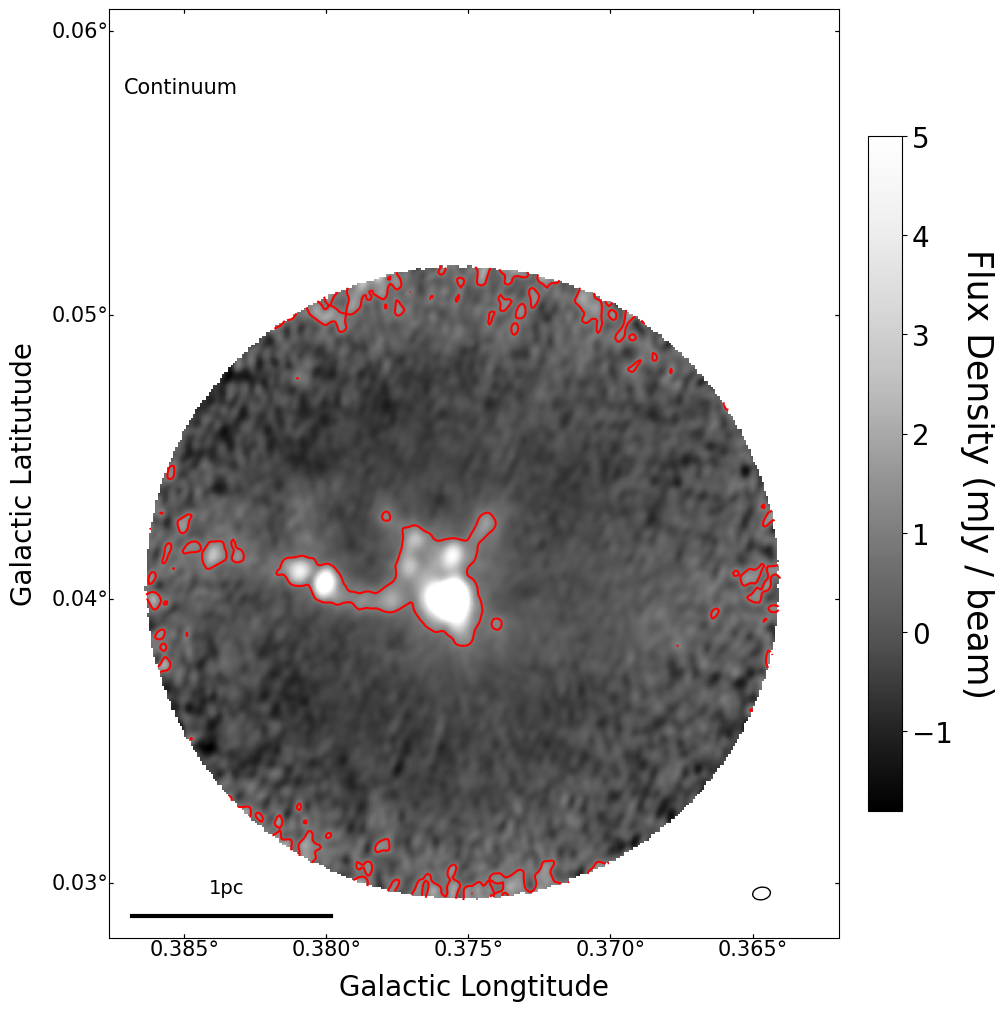

In [2]:
import math
import astropy.io.fits as fits
import matplotlib
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS    
from radio_beam import Beam
from astropy import units as u  
import pylab
import numpy as np
import reproject
from spectral_cube import SpectralCube   
from reproject.mosaicking import find_optimal_celestial_wcs 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
'''
path ="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image=fits.getdata(path)
mJy_image = image * 1000        # 1 Jy = 1000 mJy so we would multiply our image by 1000
header['BUNIT'] = 'mJy/beam '
print(header['BUNIT'])
fits.writeto('CloudC_mJy.fits',mJy_image,header,overwrite=True) 
'''

path ="CloudC_mJy.fits"
image=fits.getdata(path)

header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)
print(type(image))

image_2D = pylab.squeeze(image)

######
wcs_out,shape_out= find_optimal_celestial_wcs([(image_2D,w1)],frame='galactic')     # Use reproject functions
cont,c_footprint = reproject.reproject_interp((image_2D,w1),wcs_out,shape_out=shape_out)      # Rotate image
 
#init plot and axes
fig1 = plt.figure(1,figsize=(10,10),constrained_layout=True)       
ax1 = plt.subplot(projection=wcs_out)            
lon = ax1.coords[0]
lon.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)
lat = ax1.coords[1]
lat.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)

plt.xlim(80,410)
plt.ylim(80,410)
plt.ylim(80,500)
my_beam = Beam.from_fits_header(header)  
ycen_pix, xcen_pix = 100, 375
pixscale = 0.28 * u.arcsec
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
im1 = plt.imshow(cont,cmap='Greys_r',vmax=5)
plt.gca().add_patch(ellipse_artist)
ellipse_artist.set_facecolor("white")
ellipse_artist.set_edgecolor("black")

#plots the subcube patch
core_coords=w1.pixel_to_world(166,175)
image_coords=core_coords.to_pixel(wcs_out,0,mode="wcs")
print(image_coords)
x=[90,180]
y=[90,90]
plt.plot(np.array([x[0],x[1]]),np.array([y[0],y[1]]),color="black",linewidth=3)
scalebarBegin=w1.pixel_to_world(x[0],y[0])
scalebarEnd=w1.pixel_to_world(x[1],y[1])
sep=scalebarBegin.separation(scalebarEnd)
print(sep.degree)
print(sep.degree*3600)
pylab.text(125,100,'1pc',fontsize=14,color='black')
#pylab.text(40,25,'Smoothed Beam',fontsize=30,color='black')
#ax1.add_patch(matplotlib.patches.Circle((375,100),-1*header['BMAJ']/header['CDELT1']/2.0,fill=False,lw=3,fc='black',ec='black'))  



#circle1 = plt.Circle((image_coords[0], image_coords[1]), 8, color='r',fill=False)
#plt.gca().add_patch(circle1)

#adds contours
pylab.contour(cont,[1],colors='red')

#formats plot
lon.set_ticks(size=-3)                                                                                     
lat.set_ticks(size=-3)                                                                                   
pylab.xlabel('Galactic Longtitude',fontsize=20,labelpad=1)                              
pylab.ylabel('Galactic Latitutude',fontsize=20,labelpad=1)                                  
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)                      
plt.annotate('Continuum',fontsize=15,xy=(0.02,0.91),xycoords="axes fraction")
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (mJy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20) 

#saves fig
pylab.savefig("continuum_contours.pdf",dpi=250,pad_inches=1)
pylab.savefig("continuum_contours.png",dpi=250,pad_inches=1)

## C1, C2, C3 Walker paper

<class 'numpy.ndarray'>
(array(235.11475751), array(232.9574565))
0.00700000002961245
25.20000010660482
center: (array(178.09026812), array(361.72279521))
c1: <SkyCoord (Galactic): (l, b) in deg
    (0.37623333, 0.03979722)> R: 6.54011"
c2: <SkyCoord (Galactic): (l, b) in deg
    (0.38054167, 0.04024444)> R: 3.018512"
c3: <SkyCoord (Galactic): (l, b) in deg
    (0.3822, 0.05638056)> R: 3.77314"
c1 (RA,DEC): 17h46m21.49609837s -28d35m39.05247854s
c2 (RA,DEC): 17h46m22.00366235s -28d35m24.96478174s
c3 (RA,DEC): 17h46m18.47144977s -28d34m49.67270471s


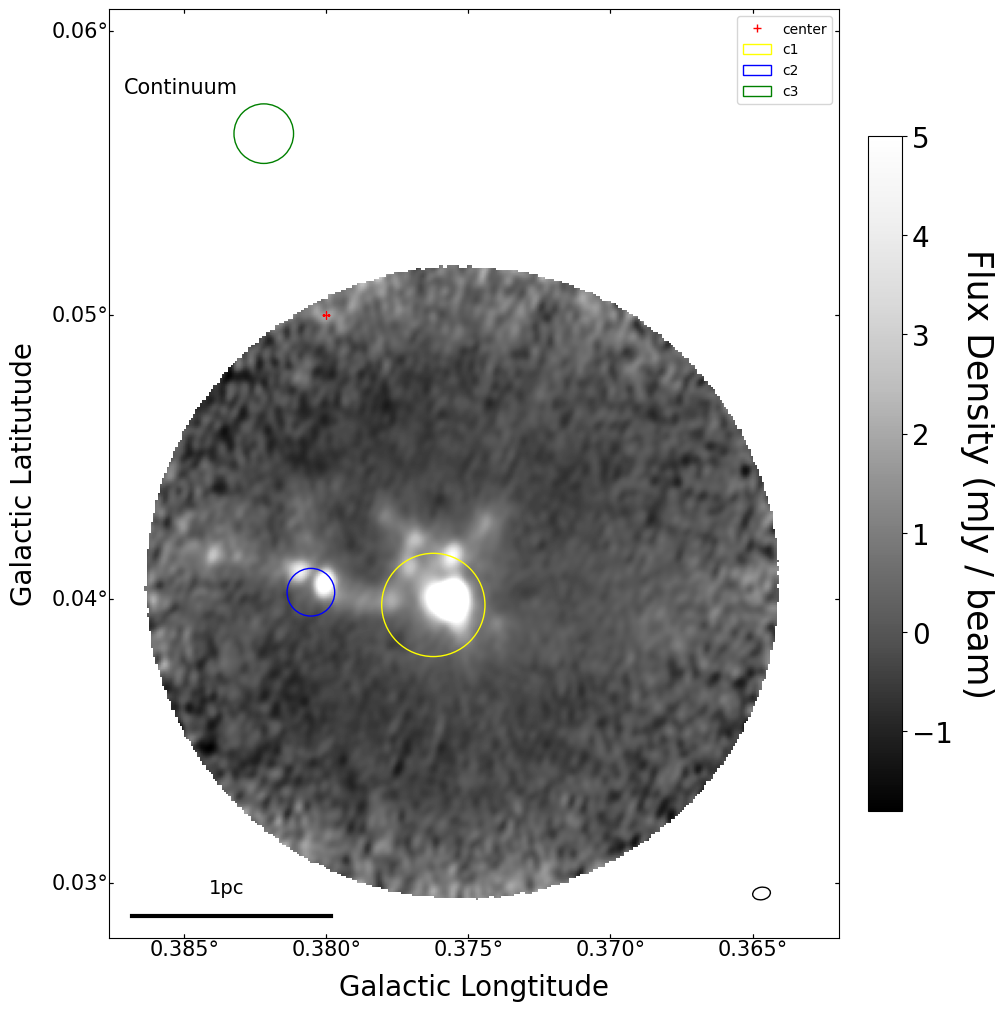

In [45]:
import math
import astropy.io.fits as fits
import matplotlib
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS    
from radio_beam import Beam
from astropy import units as u  
import pylab
import numpy as np
import reproject
from spectral_cube import SpectralCube   
from reproject.mosaicking import find_optimal_celestial_wcs 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
'''
path ="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image=fits.getdata(path)
mJy_image = image * 1000        # 1 Jy = 1000 mJy so we would multiply our image by 1000
header['BUNIT'] = 'mJy/beam '
print(header['BUNIT'])
fits.writeto('CloudC_mJy.fits',mJy_image,header,overwrite=True) 
'''

path ="CloudC_mJy.fits"
image=fits.getdata(path)

header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)
print(type(image))

image_2D = pylab.squeeze(image)

######
wcs_out,shape_out= find_optimal_celestial_wcs([(image_2D,w1)],frame='galactic')     # Use reproject functions
cont,c_footprint = reproject.reproject_interp((image_2D,w1),wcs_out,shape_out=shape_out)      # Rotate image
 
#init plot and axes
fig1 = plt.figure(1,figsize=(10,10),constrained_layout=True)       
ax1 = plt.subplot(projection=wcs_out)            
lon = ax1.coords[0]
lon.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)
lat = ax1.coords[1]
lat.set_format_unit(u.deg,decimal=True,show_decimal_unit=True)

plt.xlim(80,410)
#plt.ylim(80,410)
plt.ylim(80,500)
my_beam = Beam.from_fits_header(header)  
ycen_pix, xcen_pix = 100, 375
pixscale = 0.28 * u.arcsec
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
im1 = plt.imshow(cont,cmap='Greys_r',vmax=5)
plt.gca().add_patch(ellipse_artist)
ellipse_artist.set_facecolor("white")
ellipse_artist.set_edgecolor("black")

#plots the subcube patch
core_coords=w1.pixel_to_world(166,175)
image_coords=core_coords.to_pixel(wcs_out,0,mode="wcs")
print(image_coords)
x=[90,180]
y=[90,90]
plt.plot(np.array([x[0],x[1]]),np.array([y[0],y[1]]),color="black",linewidth=3)
scalebarBegin=w1.pixel_to_world(x[0],y[0])
scalebarEnd=w1.pixel_to_world(x[1],y[1])
sep=scalebarBegin.separation(scalebarEnd)
print(sep.degree)
print(sep.degree*3600)
pylab.text(125,100,'1pc',fontsize=14,color='black')
#pylab.text(40,25,'Smoothed Beam',fontsize=30,color='black')
#ax1.add_patch(matplotlib.patches.Circle((375,100),-1*header['BMAJ']/header['CDELT1']/2.0,fill=False,lw=3,fc='black',ec='black'))  

#core coord G0.38+0.050
#define point
center = SkyCoord(0.38, 0.05, unit="deg", frame="galactic")
center_pix=center.to_pixel(wcs_out,0,mode="wcs")
print("center:", center_pix)
plt.plot(center_pix[0],center_pix[1],"+",color="red",label="center")
#plot core c1


#circle1 = plt.Circle((image_coords[0], image_coords[1]), 8, color='r',fill=False)
#plt.gca().add_patch(circle1)
c=[]
def offset(source,l_offset, b_offset,radius):
    #asec to degs, 1 deg=3600 asec
    l_off_deg=l_offset*u.arcsec*-1
    b_off_deg=b_offset*u.arcsec
    coord=center.spherical_offsets_by(l_off_deg,b_off_deg)
    #radius, pc --> asec
    dist=8.2*10**3
    asec=round((radius/dist)*206265,6)
    print(f"{source}: {coord} R: {asec}\"")
    c.append(coord)
    return coord.to_pixel(wcs_out,0,mode="wcs"),asec/0.28
    
c1,c1_radius=offset("c1", 13.56, -36.73,0.26)
c2,c2_radius=offset("c2", -1.95, -35.12,0.12)
c3,c3_radius=offset("c3", -7.92, 22.97,0.15)
#c_one=center.spherical_offsets_by()
c1_circle = plt.Circle((c1[0], c1[1]), c1_radius,fill=False,label="c1",color="yellow")
plt.gca().add_patch(c1_circle)
c2_circle = plt.Circle((c2[0], c2[1]), c2_radius,fill=False,label="c2", color="blue")
plt.gca().add_patch(c2_circle)
c3_circle = plt.Circle((c3[0], c3[1]), c3_radius,fill=False,label="c3",color="green")
plt.gca().add_patch(c3_circle)
for i in range(1,4):
    print(f"c{i} (RA,DEC): {c[i-1].fk5.to_string(style='hmsdms')}")
#adds contours
#pylab.contour(cont,[1],colors='red')

#formats plot
lon.set_ticks(size=-3)                                                                                     
lat.set_ticks(size=-3)                                                                                   
pylab.xlabel('Galactic Longtitude',fontsize=20,labelpad=1)                              
pylab.ylabel('Galactic Latitutude',fontsize=20,labelpad=1)                                  
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)                      
plt.annotate('Continuum',fontsize=15,xy=(0.02,0.91),xycoords="axes fraction")
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (mJy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20) 
pylab.legend()

#saves fig
pylab.savefig("continuum_walker_sources.pdf",dpi=250,pad_inches=1)
pylab.savefig("continuum_walker_sources.png",dpi=250,pad_inches=1)